## Part 1: Analyze the network

The questions in this part are based on Lecture 5.

- **Present an analysis/description of the network of bands/artists using tools from Lecture 5. Imagine that you have been tasked with presenting the important facts about the network to an audience who knows about network science, but doesn't know about this particular network.**
    - It's OK to also use basic concepts like degree distributions (even though they're from week 4) in your analysis. That way you can make the analysis a standalone, coherent thing.
    - I would like you to include concepts like centrality and assortativity in your analysis.
    - Use a network backbone in your analysis.
    - In addition to standard distribution plots (e.g. degree distributions, etc), your analysis should also include at least one network visualization (but it doesn't have to display the entire network, you can also visualize a network backbone).
    - Note: As I write above, an important part of the exercise consists is selecting the right elements of the lecture to create a meaningful analysis. So don't solve this part by going exhaustive and just calculating everything you can think of in one massive analysis. Try to focus on using what you've learned to characterize the network.

In [1]:
#  Loading the graph from Github as decribed in the exercise
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import requests
import random

The network in question is an directed graph. The nodes are mainstream rock bands/performers (a list taken from wikipedia). The edges between nodes represent, links between the wikipedia pages of the bands. Meaning, an edges from node 1 to node 2 represents a link in the wiki page of band 1 to the wiki page of band 2. Below is the number of edges and nodes printed.
To visualise the network, we take the Giant Connected Component and use the undirected version.

Number of nodes in G: 473
Number of edges in G: 7452
Number of nodes in GCC: 473
Number of edges in GCC: 7452


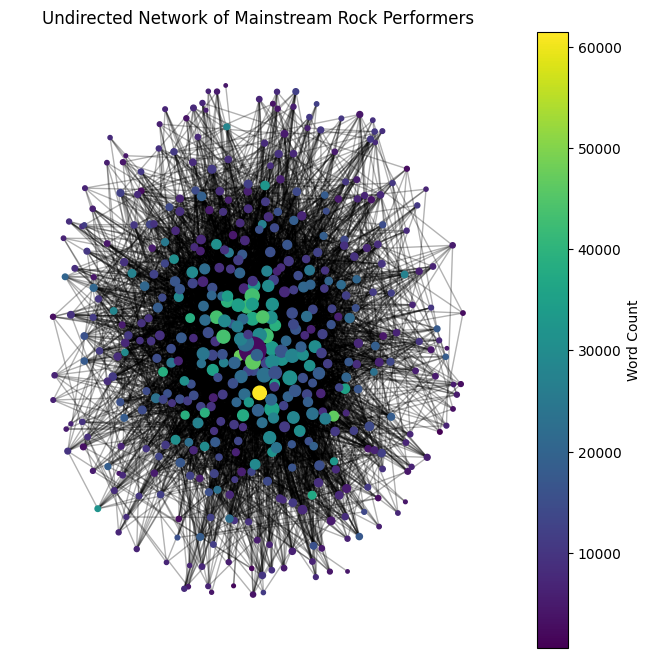

In [10]:
# load graph from URL
url = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Noa/Bands_graph.graphml"# Loading graph from a GraphML file from a URL
data = requests.get(url).text  
G = nx.parse_graphml(data)

#### BASIC INFO
print(f"Number of nodes in G: {G.number_of_nodes()}")
print(f"Number of edges in G: {G.number_of_edges()}")

### VISULISATION
largest_cc = max(nx.weakly_connected_components(G), key=len) #  largest connected component
GCC = G.subgraph(largest_cc).copy()
GCC_undirected = GCC.to_undirected()

print(f"Number of nodes in GCC: {GCC.number_of_nodes()}")
print(f"Number of edges in GCC: {GCC.number_of_edges()}")

# plot 
plt.figure(figsize=(8,8))
pos = nx.spring_layout(GCC_undirected, seed=42, k = 0.8)  # positions for all 
#pos = nx.forceatlas2_layout(GCC_undirected, seed=42, strong_gravity=True)  # positions for all nodes

# node sizes based on degree
node_sizes = [5 + 1 * GCC_undirected.degree(n) for n in GCC_undirected.nodes()]

# node colors based on word count (content length)
node_colors = [GCC_undirected.nodes[n]['word_count'] for n in GCC_undirected.nodes()]
nodes = nx.draw_networkx_nodes(GCC_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(GCC_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()

Above, the network of mainstream rock performers is displayed. It is evident that the graph is highly connected. It has 488 (483 in GCC)

n